## USE_CASE: GRAPHIQUES 


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from pandas_ods_reader import read_ods
warnings.filterwarnings('ignore')

### **Recuperation des dataset**

In [3]:
#Data session d'hiver: 
df_s1= pd.read_excel("etudfinal1.xlsx")
#df_s1.head(5)

In [4]:
#Data session d'été 
path = "./etudfinal.ods"
df_s2 = read_ods(path)
#df_s2.head(5)

### **Graphe(SEXE)**

In [5]:
#Extraction des colones sexes pour chaque session 
sex_sum= df_s2["Sexe"]
sex_wint= df_s1["Sexe"]

In [6]:
#Creation des colonnes sex issuent des deux dataset  
sex_sum = sex_sum.to_frame()
sex_wint = sex_wint.to_frame()
sex_sum.rename(columns={"Sexe":"Sex_sumer"},inplace=True)
sex_wint.rename(columns={"Sexe":"Sex_winter"},inplace=True)

In [7]:
#reduire au même nombre d'échantillon: len(session été) = len(session hiver)
sx_sum_new = sex_sum[["Sex_sumer"]].sample(245).reset_index()

In [8]:
#new dataset avec un nombre d'échantillon égal pour les deux saisons 
df_sex= pd.concat([sx_sum_new,sex_wint],axis=1)

In [9]:
#Calcul des pourcentages hommes & femmes 
Sumer_percent = df_sex["Sex_sumer"].value_counts()*100 /len(df_sex)
Winter_percent = df_sex["Sex_winter"].value_counts()* 100/len(df_sex)

In [74]:
df_prcent = pd.concat([Sumer_percent,Winter_percent],axis=1) 

In [85]:
df_prcent= df_prcent.fillna(0)

In [57]:
import seaborn as sns

In [62]:
df_s = pd.DataFrame(Sumer_percent)
df_s

,Sex_sumer
Femme,71.836735
Homme,28.163265


In [86]:
df_prcent

,Sex_sumer,Sex_winter
Femme,71.836735,73.469388
Homme,28.163265,25.306122
"Femme, Homme",0.000000,1.224490


<AxesSubplot:ylabel='Count'>

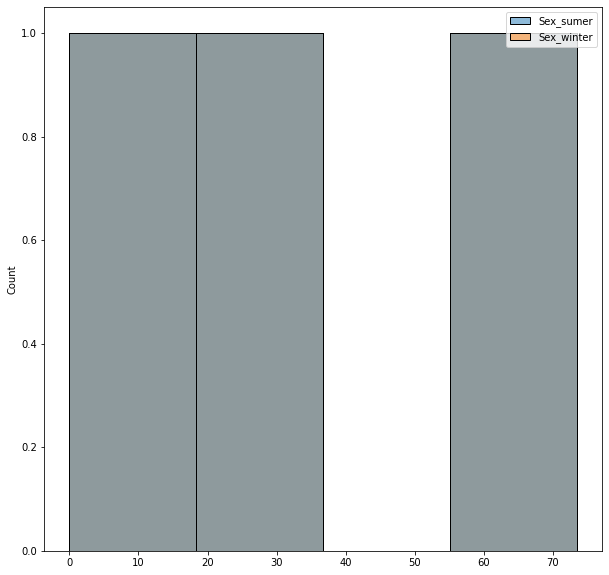

In [95]:
plt.figure(figsize=(10,10))
sns.histplot(df_prcent)

<AxesSubplot:ylabel='Sex_winter'>

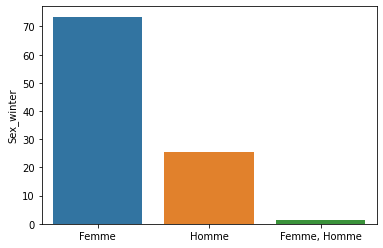

In [83]:
sns.barplot(df_prcent.index, df_prcent['Sex_winter'])

<AxesSubplot:ylabel='Sex_sumer'>

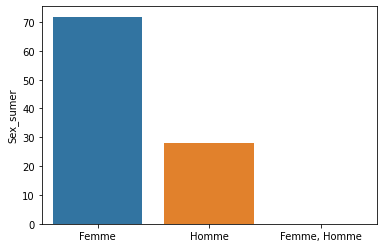

In [89]:
sns.barplot(df_prcent.index, df_prcent['Sex_sumer'])

In [10]:
print(Sumer_percent)
print(Winter_percent) 

Femme    71.836735
Homme    28.163265
Name: Sex_sumer, dtype: float64
Femme           73.469388
Homme           25.306122
Femme, Homme     1.224490
Name: Sex_winter, dtype: float64


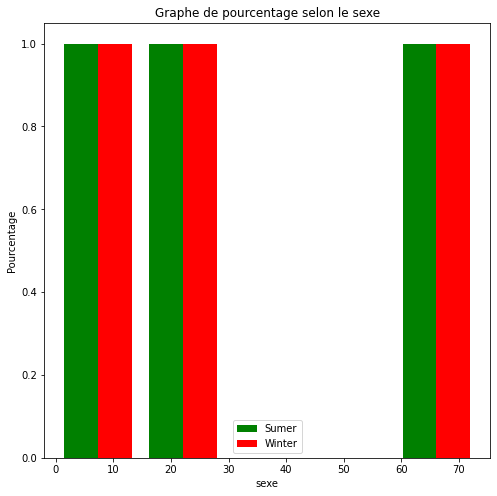

In [96]:
plt.figure(figsize=(8,8))
plt.hist(df_prcent, bins=5, color = ['green', 'red'],label = ['Sumer', 'Winter'])
plt.ylabel('Pourcentage')
plt.xlabel('sexe')
plt.title('Graphe de pourcentage selon le sexe')
plt.legend();

array([[<AxesSubplot:title={'center':'index'}>]], dtype=object)

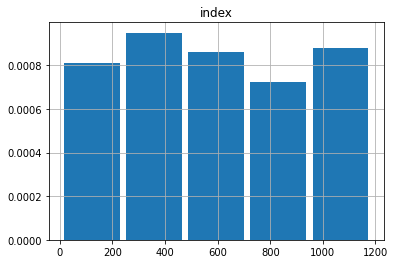

### **Graphe(AGE)**

### **Graphe: age par boutique** 